Text(0.5, 1.0, 'Surface forestière (%\xa0du territoire)')

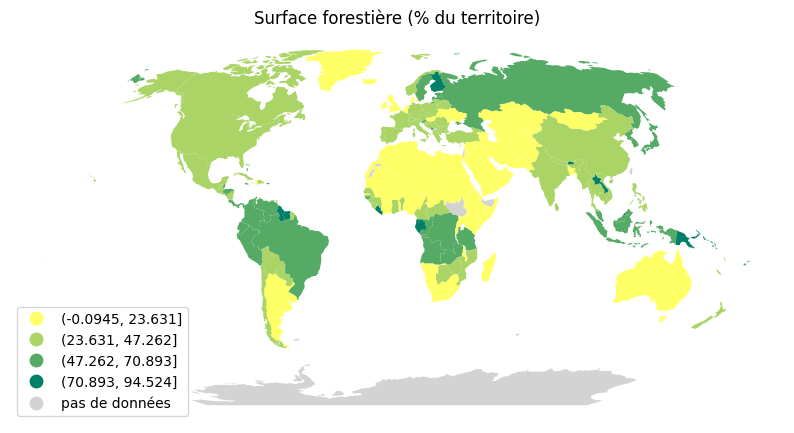

In [1]:
# chargement des bibliothèques
import geopandas
import pandas 

# chargement de la carte
fond_carte = geopandas.read_file("cartes/MONDE.shp")

# chargement des données 
# 1) À MODIFIER !!! 
# - Changez EXEMPLE_1.csv par le nom de votre fichier CSV 
# - ne pas oublier l'extension ''.csv' et le dossier 'data\'
données = pandas.read_csv("data/EXEMPLE_1.csv")

# mise en classe 
# 2) À MODIFIER !!! 
# - En fonction de ce que vous voulez montrer, changer de méthode (amplitude fixe, effectifs fixes...)
# - changer le nombre de classes, eventuellement rajouter des étiquettes
données["2022_af"] = pandas.cut( données["2022"], bins=4 )

# jointure carte / données
# 3) À MODIFIER !!! 
# - right_on="Country Code" -> changer "Country Code" par le nom de votre clés contenant le code ISO3 des pays : CHE, DEU, FRA, etc. 
carte = fond_carte.merge(données, how="left", left_on="ADM0_A3", right_on="Country Code")

# changement de projection
carte = carte.to_crs('ESRI:54030')

# affichage de la carte
# 4) À MODIFIER !!!
# - changer la colonne à afficher
# - mettre en forme
ma_carte = carte.plot(
    column="2022_af",
    legend=True, 
    cmap='summer_r',
    missing_kwds={
        'color':'lightgray',
        'label':'pas de données'
    }, 
    legend_kwds={
        'loc': 'lower left'
    },
    figsize=(10, 6)
)
ma_carte.set_axis_off()
ma_carte.set_title("Surface forestière (% du territoire)")